In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
import math
import matplotlib.pyplot as plt

In [216]:
x=np.array([0,5,15,25,35])
y=np.array([0.5,0.1,0,0,0])
a=y[0]

In [217]:
a

0.5

In [218]:
def func(x,r,u):
    g=(a*(1-r))/(1-r*np.exp(-u*x))
    return g

In [219]:
initial_guess=[0.5,0.2]
pars, pcov=curve_fit(func,x,y,p0=initial_guess)

In [220]:
pars #The values are R and u respectively

array([9.99988602e-01, 1.19464945e-05])

In [221]:
alpha= 0.05 #95%confidence interval
n=len(y)
p=len(pars)
dof=max(0,n-p) #number of degrees of freedom

tval=t.ppf(1-0.5*alpha,dof)
sigma=np.diag(pcov)**0.5
moe=tval*sigma

In [222]:
print(moe) #The values are the margin of error for R and u respectively

[0.12500878 0.13107841]


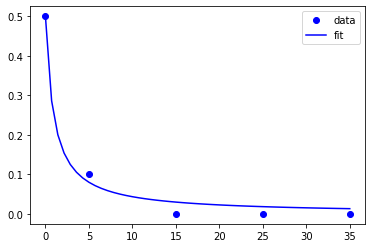

In [223]:
plt.plot(x,y,'bo ')
xfit = np.linspace(0,35)
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'b-')
plt.legend(['data','fit'],loc='best')
plt.show()